### 1. Introdução à Lógica Fuzzy

A lógica fuzzy é uma extensão da lógica booleana que permite lidar com a incerteza e a imprecisão, utilizando graus de verdade em vez de valores binários. Isso é particularmente útil em sistemas de controle onde as condições podem variar de forma contínua, como no controle de velocidade de um veículo para manter uma distância segura do carro à frente.

---

<img src = "images/fuzzy.png">

* Grau de pertinência: o quanto um elemento 'x' pertence a um conjunto 'A'
* Variável: rótulo associado a uma variável linguística
* Conjunto de termos: nomes dados aos valores de cada variável
* Universo de discurso: domínio em que cada variável é definida

<img src = "images/fluxograma.png">

---


### 2. Definição das Variáveis de Entrada e Saída

Definiremos duas variáveis de entrada:

- **Distância (`distancia`)**: A distância atual entre o carro controlado e o carro à frente (em metros).
- **Variação da Distância (`delta_distancia`)**: A taxa de variação da distância em relação ao tempo (em metros por segundo).

E uma variável de saída:

- **Velocidade (`velocidade`)**: A velocidade ajustada para o carro controlado (em km/h).

In [ ]:
# Importando as bibliotecas 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Comando para exibir gráficos 
%matplotlib inline

### 3. Definição das Funções de Pertinência

Primeiro, definiremos as variáveis fuzzy com seus respectivos universos de discurso e funções de pertinência.


In [4]:
# Definindo as variáveis de entrada e saída com seus respectivos universos

#Entrada
distancia = ctrl.Antecedent(np.arange(0, 1001, 1), 'distancia')  # 0 a 1000 metros
delta_distancia = ctrl.Antecedent(np.arange(-45, 46, 1), 'delta_distancia')  # -45 a 45 m/s

#Saida
velocidade = ctrl.Consequent(np.arange(0, 163, 1), 'velocidade')  # 0 a 162 km/h

c:\Users\izalo\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


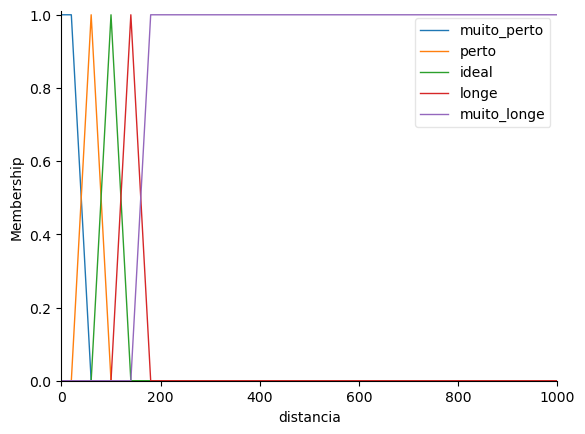

In [5]:
# Definindo as funções de pertinência para 'distancia'
distancia['muito_perto'] = fuzz.trapmf(distancia.universe, [0, 0, 20, 60])
distancia['perto'] = fuzz.trimf(distancia.universe, [20, 60, 100])
distancia['ideal'] = fuzz.trimf(distancia.universe, [60, 100, 140])
distancia['longe'] = fuzz.trimf(distancia.universe, [100, 140, 180])
distancia['muito_longe'] = fuzz.trapmf(distancia.universe, [140, 180, 1000, 1000])

distancia.view(title='Funções de Pertinência - Distância')

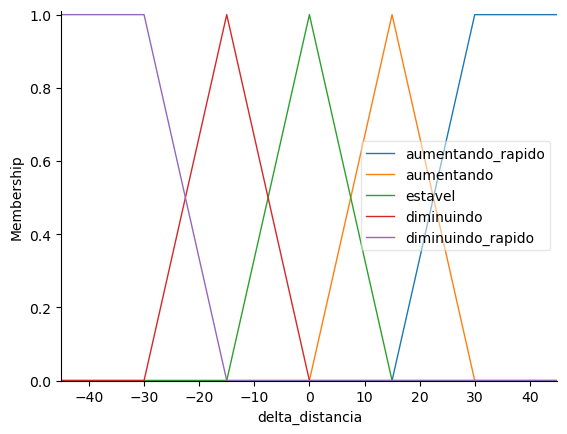

In [6]:
# Definindo as funções de pertinência para 'delta_distancia'
delta_distancia['aumentando_rapido'] = fuzz.trapmf(delta_distancia.universe, [15, 30, 45, 45])
delta_distancia['aumentando'] = fuzz.trimf(delta_distancia.universe, [0, 15, 30])
delta_distancia['estavel'] = fuzz.trimf(delta_distancia.universe, [-15, 0, 15])
delta_distancia['diminuindo'] = fuzz.trimf(delta_distancia.universe, [-30, -15, 0])
delta_distancia['diminuindo_rapido'] = fuzz.trapmf(delta_distancia.universe, [-45, -45, -30, -15])

delta_distancia.view(title='Funções de Pertinência - Variação da Distância')


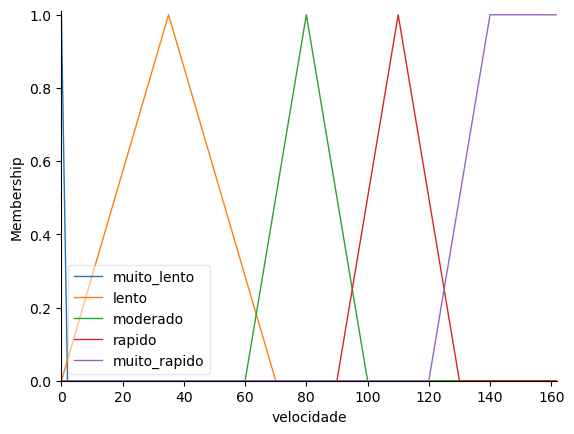

In [7]:
# Definindo as funções de pertinência para 'velocidade'
#velocidade['muito_lento'] = fuzz.trapmf(velocidade.universe, [0, 0, 20, 40])
#velocidade['lento'] = fuzz.trimf(velocidade.universe, [30, 50, 70])
velocidade['muito_lento'] = fuzz.trimf(velocidade.universe, [0, 0, 2])
velocidade['lento'] = fuzz.trimf(velocidade.universe, [0, 35, 70])
velocidade['moderado'] = fuzz.trimf(velocidade.universe, [60, 80, 100])
velocidade['rapido'] = fuzz.trimf(velocidade.universe, [90, 110, 130])
velocidade['muito_rapido'] = fuzz.trapmf(velocidade.universe, [120, 140, 162, 162])

velocidade.view(title='Funções de Pertinência - Velocidade')


**Explicação das Funções de Pertinência:**

- **Distância (`distancia`)**:
  - **muito_perto**: Distâncias entre 0 e 60 metros.
  - **perto**: Distâncias entre 20 e 100 metros.
  - **ideal**: Distâncias entre 60 e 140 metros.
  - **longe**: Distâncias entre 100 e 180 metros.
  - **muito_longe**: Distâncias acima de 180 metros.

- **Variação da Distância (`delta_distancia`)**:
  - **aumentando_rapido**: Aumento rápido da distância (15 a 45 m/s).
  - **aumentando**: Aumento moderado (0 a 30 m/s).
  - **estavel**: Variação mínima (-15 a 15 m/s).
  - **diminuindo**: Diminuição moderada (-30 a 0 m/s).
  - **diminuindo_rapido**: Diminuição rápida (-45 a -15 m/s).

- **Velocidade (`velocidade`)**:
  - **muito_lento**: 0 a 2 km/h.
  - **lento**: 0 a 70 km/h.
  - **moderado**: 60 a 100 km/h.
  - **rápido**: 90 a 130 km/h.
  - **muito_rápido**: 120 a 162 km/h.

---

### 4. Definição das Regras Fuzzy

As regras fuzzy determinam como as variáveis de entrada influenciam a variável de saída. Vamos definir um conjunto mais abrangente de regras para capturar diferentes cenários.


<img src = "images/fuzzy_carro.png">

In [8]:
# Definindo as regras fuzzy

# Regras baseadas na distância
rule0 = ctrl.Rule(distancia['muito_longe'], velocidade['muito_rapido'])

rule1 = ctrl.Rule(distancia['muito_perto'] & delta_distancia['diminuindo_rapido'], velocidade['muito_lento'])
rule2 = ctrl.Rule(distancia['muito_perto'] & delta_distancia['diminuindo'], velocidade['muito_lento'])
rule3 = ctrl.Rule(distancia['muito_perto'] & delta_distancia['estavel'], velocidade['muito_lento'])
rule4 = ctrl.Rule(distancia['muito_perto'] & delta_distancia['aumentando'], velocidade['lento'])
rule5 = ctrl.Rule(distancia['muito_perto'] & delta_distancia['aumentando_rapido'], velocidade['moderado'])

rule6 = ctrl.Rule(distancia['perto'] & delta_distancia['diminuindo_rapido'], velocidade['muito_lento'])
rule7 = ctrl.Rule(distancia['perto'] & delta_distancia['diminuindo'], velocidade['muito_lento'])
rule8 = ctrl.Rule(distancia['perto'] & delta_distancia['estavel'], velocidade['lento'])
rule9 = ctrl.Rule(distancia['perto'] & delta_distancia['aumentando'], velocidade['moderado'])
rule10 = ctrl.Rule(distancia['perto'] & delta_distancia['aumentando_rapido'], velocidade['rapido'])

rule11 = ctrl.Rule(distancia['ideal'] & delta_distancia['diminuindo_rapido'], velocidade['muito_lento'])
rule14 = ctrl.Rule(distancia['ideal'] & delta_distancia['diminuindo'], velocidade['lento'])
rule12 = ctrl.Rule(distancia['ideal'] & delta_distancia['estavel'], velocidade['moderado'])
rule13 = ctrl.Rule(distancia['ideal'] & delta_distancia['aumentando'], velocidade['rapido'])
rule15 = ctrl.Rule(distancia['ideal'] & delta_distancia['aumentando_rapido'], velocidade['muito_rapido'])

rule16 = ctrl.Rule(distancia['longe'] & delta_distancia['diminuindo_rapido'], velocidade['lento'])
rule17 = ctrl.Rule(distancia['longe'] & delta_distancia['diminuindo'], velocidade['moderado'])
rule18 = ctrl.Rule(distancia['longe'] & delta_distancia['estavel'], velocidade['rapido'])
rule19 = ctrl.Rule(distancia['longe'] & delta_distancia['aumentando'], velocidade['muito_rapido'])
rule20 = ctrl.Rule(distancia['longe'] & delta_distancia['aumentando_rapido'], velocidade['muito_rapido'])


In [9]:
regras = [
    rule0, rule1, rule2, rule3, rule4, rule5, rule6,
    rule7, rule8, rule9, rule10, rule11, rule12,
    rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20
]


**Explicação das Regras:**

1. **Distância Muito Perto**:
   - **Diminuindo Rápido**: A velocidade deve ser **muito lenta** para evitar colisão.
   - **Diminuindo**: A velocidade permanece **muito lenta**.
   - **Estável**: Mantém a velocidade **muito lenta**.

2. **Distância Perto**:
   - **Diminuindo**: A velocidade continua **muito lenta**.
   - **Estável**: Aumenta para **lento**.
   - **Aumentando**: Ajusta para **moderado**.

3. **Distância Ideal**:
   - **Diminuindo**: Reduz para **lento**.
   - **Estável**: Mantém a velocidade **moderada**.
   - **Aumentando**: Aumenta para **rápido**.

4. **Distância Longe**:
   - **Diminuindo**: Reduz para **moderado**.
   - **Estável**: Aumenta para **rápido**.
   - **Aumentando**: Aumenta para **muito rápido**.

5. **Distância Muito Longe**:
   - **Aumentando**: Aumenta para **muito rápido**.
---

### 5. Criação do Sistema de Controle Fuzzy

Agora, construiremos o sistema de controle fuzzy utilizando as regras definidas.

In [10]:
# Criando o sistema de controle
controle_velocidade = ctrl.ControlSystem(regras)
simulador_velocidade = ctrl.ControlSystemSimulation(controle_velocidade)

### 6. Simulação e Análise dos Resultados

Vamos realizar algumas simulações para entender como o sistema responde a diferentes cenários.

#### Exemplo 1: Distância Ideal com Variação Estável

Cenário 1 - Velocidade Ajustada: 80.00 km/h


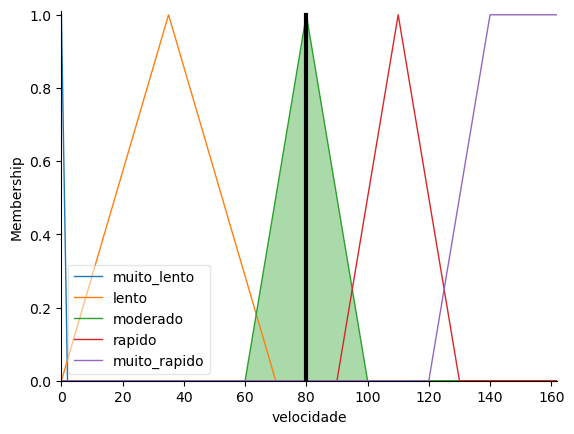

In [11]:
# Cenário 1: Distância = 100 metros (ideal), delta_distancia = 0 m/s (estável)
simulador_velocidade.input['distancia'] = 100
simulador_velocidade.input['delta_distancia'] = 0

# Computando a saída
simulador_velocidade.compute()

# Exibindo o resultado
print(f"Cenário 1 - Velocidade Ajustada: {simulador_velocidade.output['velocidade']:.2f} km/h")

# Visualizando a saída
velocidade.view(sim=simulador_velocidade)

**Resultado Esperado:**
A velocidade ajustada deve estar na faixa **moderada**, próxima de 80 km/h.

---
#### Exemplo 2: Distância Perto com Variação Diminuindo

Cenário 2 - Velocidade Ajustada: 33.55 km/h


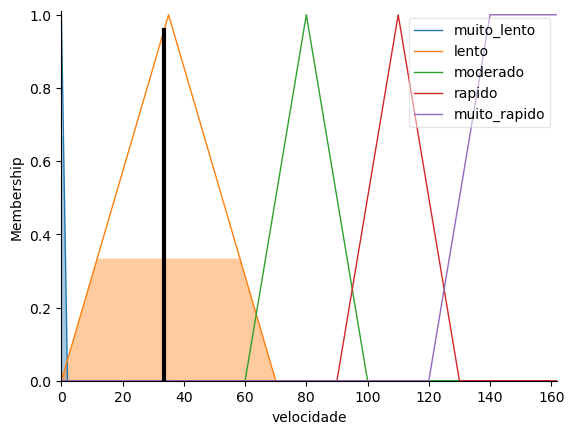

In [12]:
# Cenário 2: Distância = 50 metros (perto), delta_distancia = -10 m/s (diminuindo)
simulador_velocidade.input['distancia'] = 50
simulador_velocidade.input['delta_distancia'] = -10

# Computando a saída
simulador_velocidade.compute()

# Exibindo o resultado
print(f"Cenário 2 - Velocidade Ajustada: {simulador_velocidade.output['velocidade']:.2f} km/h")

# Visualizando a saída
velocidade.view(sim=simulador_velocidade)

**Resultado Esperado:**
A velocidade ajustada deve estar na faixa **muito lenta**, próxima de 20 km/h, para evitar colisão.

---

#### Exemplo 3: Distância Longe com Variação Aumentando

Cenário 3 - Velocidade Ajustada: 133.49 km/h


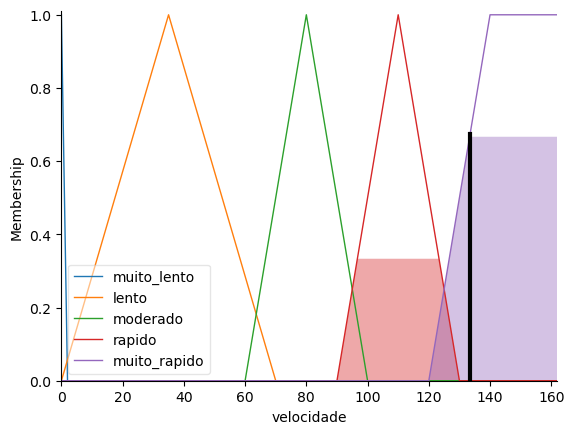

In [13]:
# Cenário 3: Distância = 150 metros (longe), delta_distancia = 10 m/s (aumentando)
simulador_velocidade.input['distancia'] = 150
simulador_velocidade.input['delta_distancia'] = 10

# Computando a saída
simulador_velocidade.compute()

# Exibindo o resultado
print(f"Cenário 3 - Velocidade Ajustada: {simulador_velocidade.output['velocidade']:.2f} km/h")

# Visualizando a saída
velocidade.view(sim=simulador_velocidade)

**Resultado Esperado:**
A velocidade ajustada deve estar na faixa **muito rápido**, próxima de 140 km/h, aproveitando a distância segura.

---

#### Exemplo 4: Distância Muito Perto com Variação Diminuindo Rápido


Cenário 4 - Velocidade Ajustada: 0.72 km/h


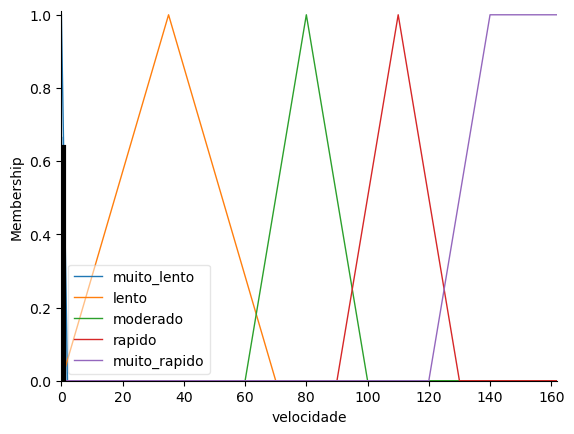

In [14]:
# Cenário 4: Distância = 15 metros (muito perto), delta_distancia = -25 m/s (diminuindo rapidamente)
simulador_velocidade.input['distancia'] = 15
simulador_velocidade.input['delta_distancia'] = -25

# Computando a saída
simulador_velocidade.compute()

# Exibindo o resultado
print(f"Cenário 4 - Velocidade Ajustada: {simulador_velocidade.output['velocidade']:.2f} km/h")

# Visualizando a saída
velocidade.view(sim=simulador_velocidade)

**Resultado Esperado:**
A velocidade ajustada deve estar na faixa **muito lenta**, próxima de 0 km/h, para garantir a segurança imediata.

---

In [16]:
# Função para realizar simulações
def simular_velocidade(dist, delta_dist):
    simulador_velocidade.input['distancia'] = dist
    simulador_velocidade.input['delta_distancia'] = delta_dist

    simulador_velocidade.compute()

    print(f"Distância: {dist} m, Variação da Distância: {delta_dist} m/s")
    print(f"Velocidade Ajustada: {simulador_velocidade.output['velocidade']:.2f} km/h\n")
    
    velocidade.view(sim=simulador_velocidade)

In [17]:
# Atualizar a função de simulação
def simulacao(iteracoes = 500, distancia_atual = 200, vel_carro_controlado = 50, vel_carro_frente_base = 80, 
                variacao_frente = 0, fix_plt_scale = False):
                
    aceleracao = 1 # Ajuste gradual de velocidade para simulação de aceleração suave

    historico_distancia = []
    historico_delta_distancia = []
    historico_velocidade = []
    historico_vel_frente = []

    for i in range(iteracoes):
        # Atualiza a velocidade do carro da frente com uma variação sinusoidal
        vel_carro_frente = vel_carro_frente_base + variacao_frente * (np.sin(i / 10))
        
        # Calcula delta_distância
        delta_distancia = (vel_carro_frente - vel_carro_controlado) * (0.27778)

        if(delta_distancia > 45):
            delta_distancia = 45
        if ((delta_distancia < -45)):
            delta_distancia = -45

        # Atualiza a distância entre os carros
        distancia_atual += delta_distancia * 0.1  # Ajuste do fator de tempo
        
        # Controlador fuzzy
        simulador_velocidade.input['distancia'] = distancia_atual
        simulador_velocidade.input['delta_distancia'] = delta_distancia
        simulador_velocidade.compute()
        
        # Nova velocidade desejada do sistema fuzzy
        vel_desejada = simulador_velocidade.output['velocidade']
        
        # Ajuste gradual da velocidade com buffer
        if vel_carro_controlado < vel_desejada:
            vel_carro_controlado = min(vel_carro_controlado + aceleracao, vel_desejada)
        else:
            vel_carro_controlado = max(vel_carro_controlado - aceleracao, vel_desejada)
        
        # Armazena os dados para análise
        historico_distancia.append(distancia_atual)
        historico_delta_distancia.append(delta_distancia)
        historico_velocidade.append(vel_carro_controlado)
        historico_vel_frente.append(vel_carro_frente)

    if (fix_plt_scale):
        # Plotar os resultados
        plt.figure(figsize=(18, 18))

        plt.subplot(3, 1, 1)
        plt.ylim(0,200)
        plt.plot(historico_distancia, label="Distância")
        plt.title("Distância entre os carros")
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.ylim(-45,45)
        plt.plot(historico_delta_distancia, label="Delta Distância")
        plt.title("Variação de Distância")
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.ylim(0,165)
        plt.plot(historico_velocidade, label="Velocidade do Carro Controlado")
        plt.plot(historico_vel_frente, label="Velocidade do Carro da Frente", linestyle="--")
        plt.title("Velocidades")
        plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        # Plotar os resultados
        plt.figure(figsize=(18, 18))

        plt.subplot(3, 1, 1)
        plt.plot(historico_distancia, label="Distância")
        plt.title("Distância entre os carros")
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(historico_delta_distancia, label="Delta Distância")
        plt.title("Variação de Distância")
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(historico_velocidade, label="Velocidade do Carro Controlado")
        plt.plot(historico_vel_frente, label="Velocidade do Carro da Frente", linestyle="--")
        plt.title("Velocidades")
        plt.legend()

        plt.tight_layout()
        plt.show()

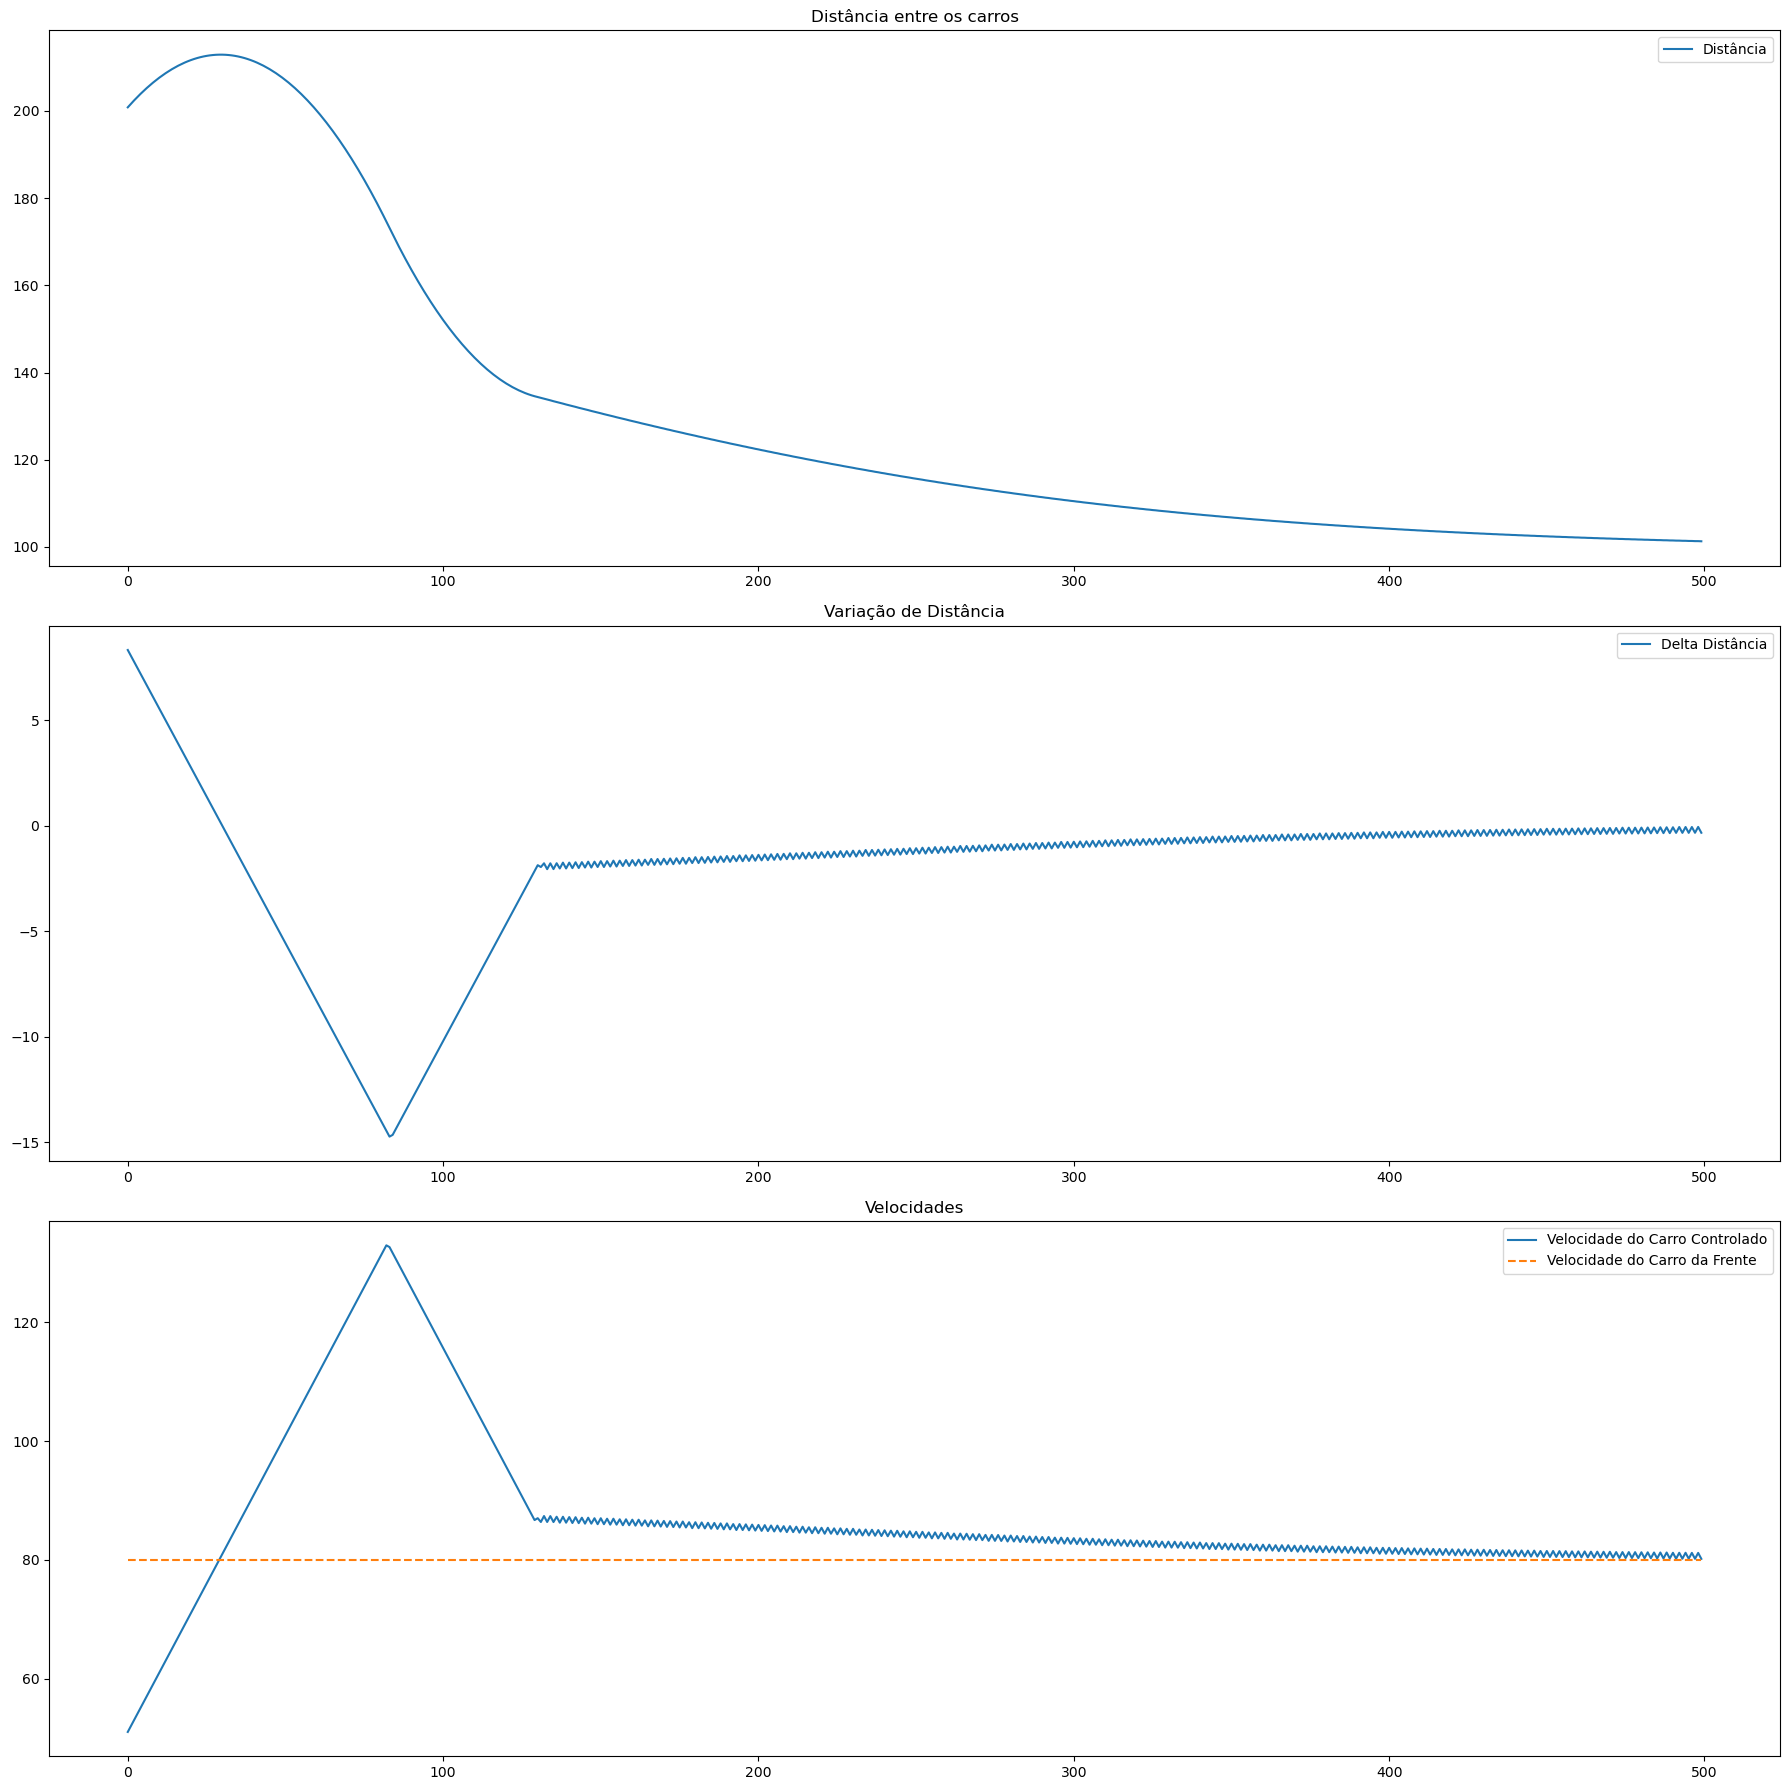

In [18]:
simulacao(iteracoes=500)

Distância: 100 m, Variação da Distância: 0 m/s
Velocidade Ajustada: 80.00 km/h



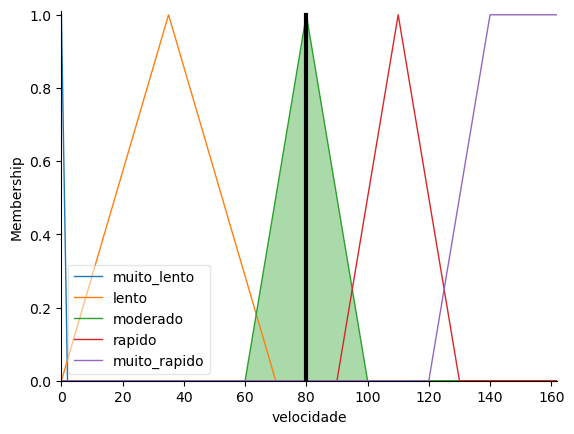

In [19]:
simular_velocidade(100,0)

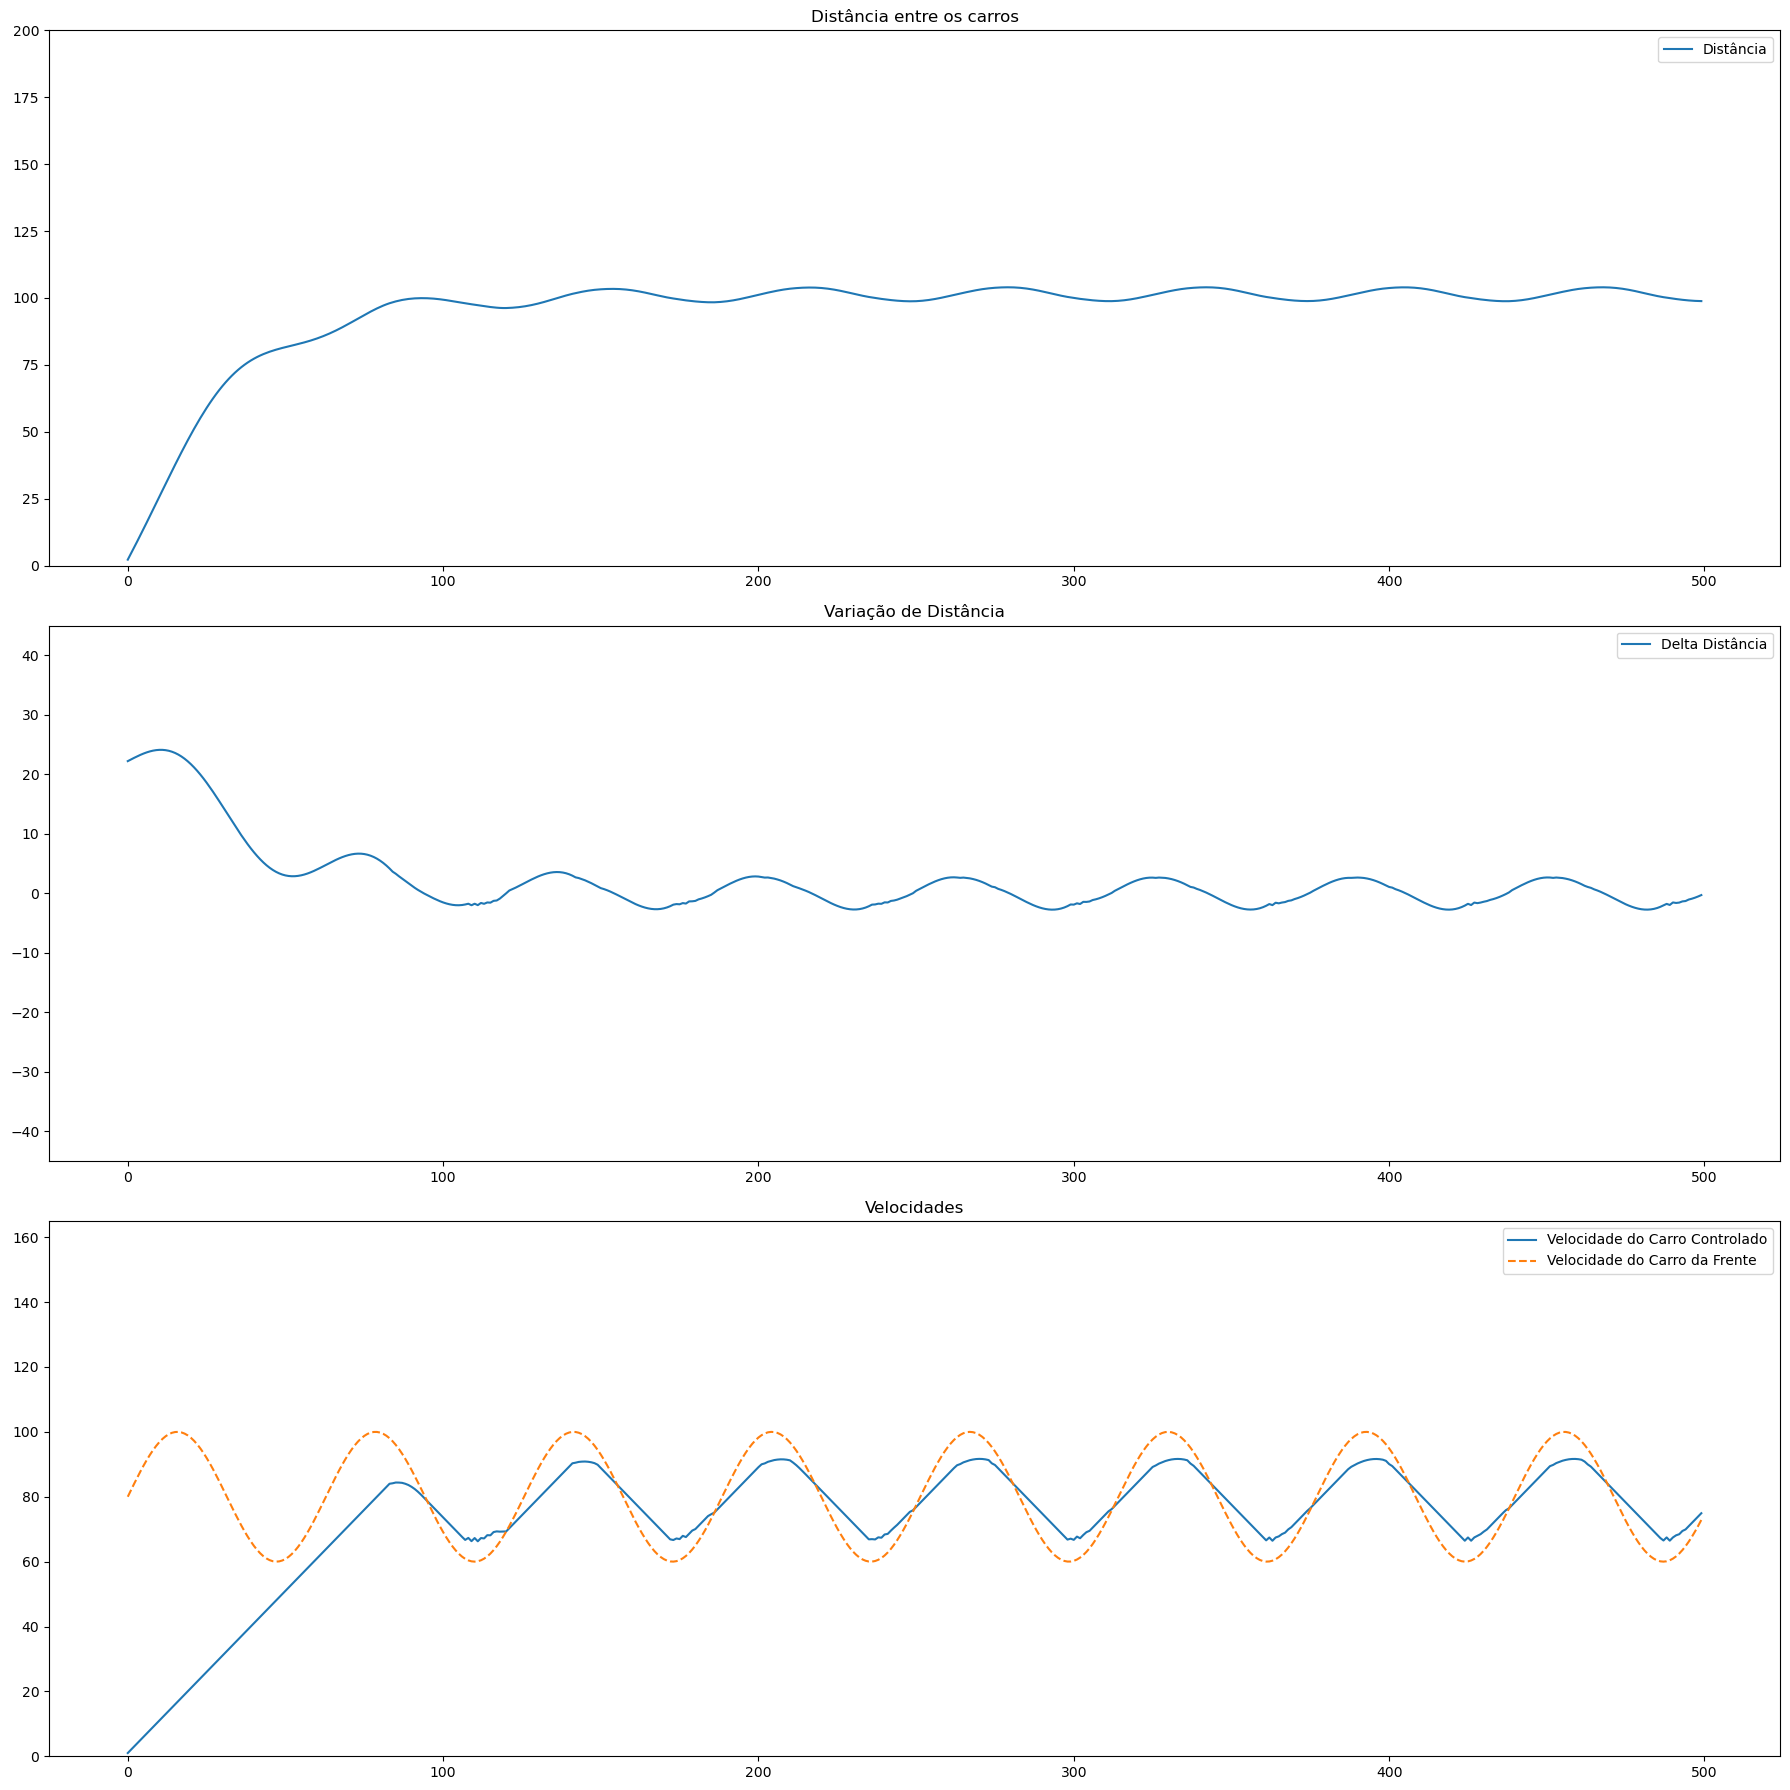

In [20]:
simulacao(distancia_atual = 0, vel_carro_controlado = 0, vel_carro_frente_base = 80, variacao_frente = 20, fix_plt_scale = True)